# YOLOv8 牙齿检测 Demo

1. 测试集中单张图片检测效果【真实标签 vs 模型预测】

- 绿色框 --> 真实标签
- 红色框 --> 模型预测

正在加载模型...
模型加载成功!
类别名称: ['Impacted', 'Caries', 'Periapical Lesion', 'Deep Caries']
找到 5 张测试图像
1. train_127.png
2. train_127.png
3. train_148.png
4. train_148.png
5. train_171.png


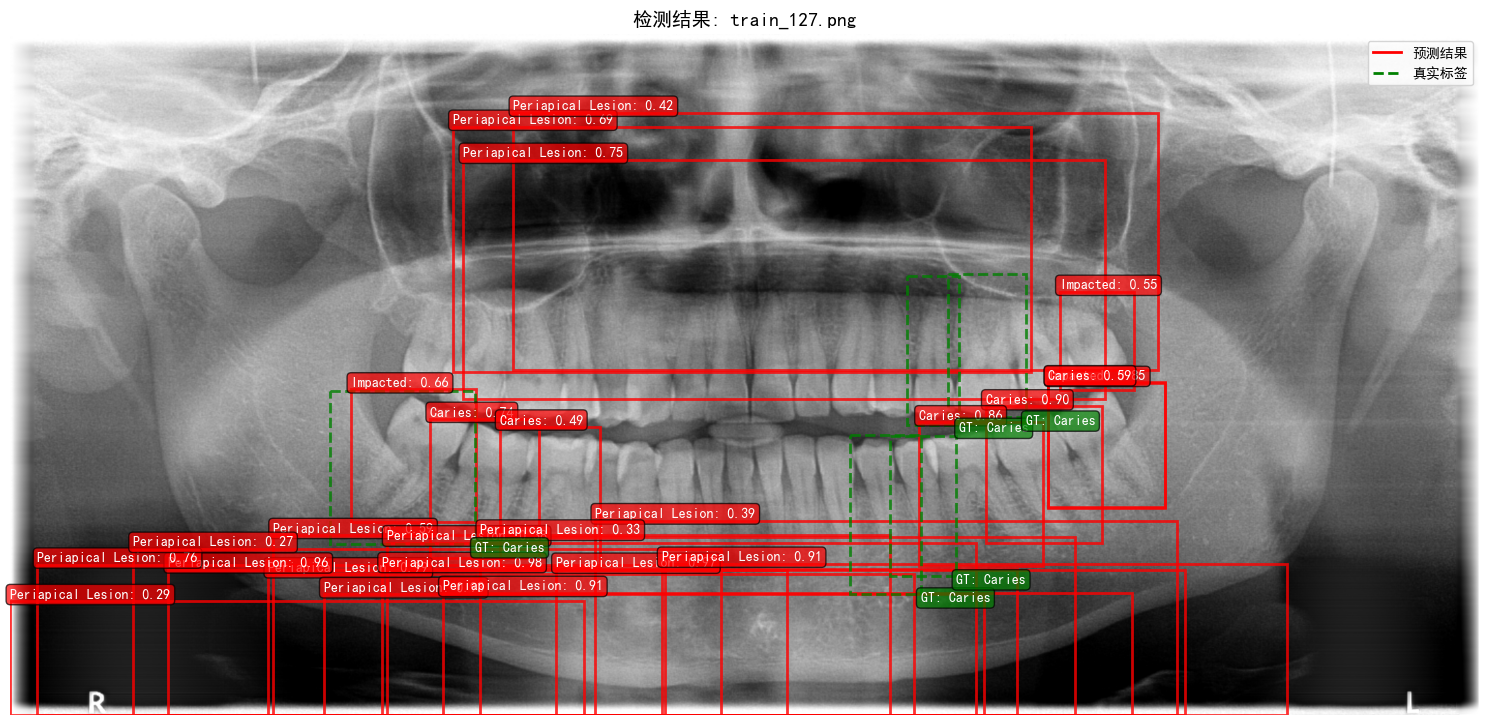

In [20]:
# DentalAI Detection Demo - 测试集对比分析

from utils.demo_utils import DentalDetectionDemo
import os

# 配置路径
model_path = "outputs/dentalx/train_yolov8m_1ep_2025_08_16_10_24_33/weights/best.pt"
data_yaml = "preprocessed_datasets/dentalx/data.yaml"

# 创建演示对象
demo = DentalDetectionDemo(model_path, data_yaml)

# 获取测试集图像列表
test_images_dir = "preprocessed_datasets/dentalx/test/images"
images = demo.get_available_images(test_images_dir, max_count=5)

print(f"找到 {len(images)} 张测试图像")
for i, img_path in enumerate(images):
    print(f"{i+1}. {img_path.name}")

# 选择第一张图像进行演示
if images:
    demo.visualize_detection(str(images[0]))

2. 任意单张图片检测效果【模型预测】

- 红色框 --> 模型预测

模型路径: outputs/dentalx/train_yolov8m_1ep_2025_08_16_10_24_33/weights/best.pt
图片路径: preprocessed_datasets/dentalx/test/images/train_127.png
所有文件存在，准备开始检测！
正在加载模型...
模型加载成功!
未提供数据配置文件，使用默认类别名称


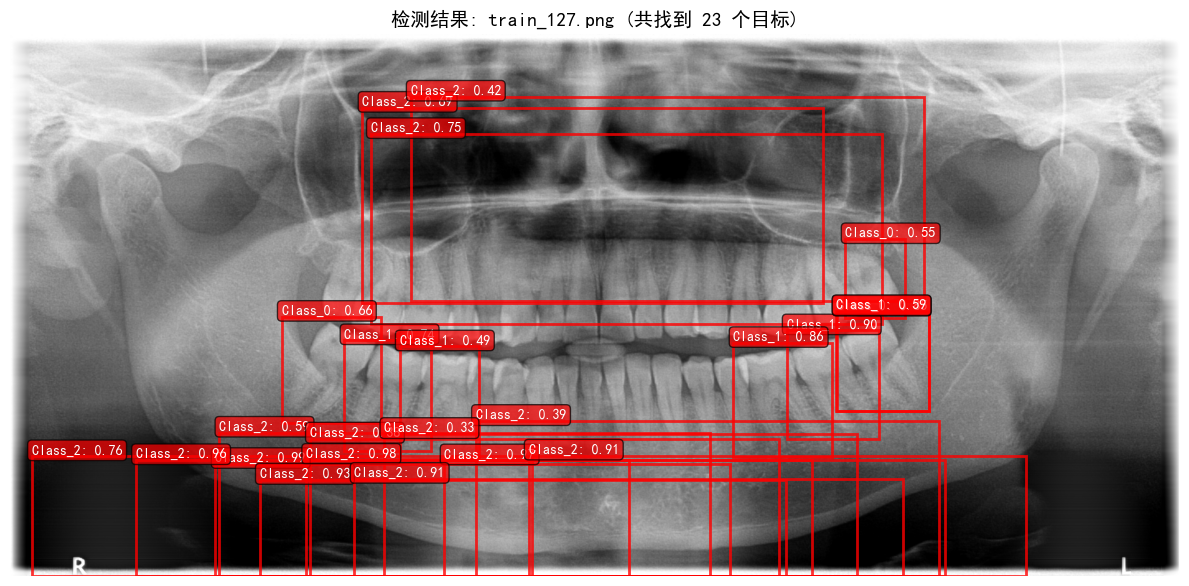

检测完成，共发现 23 个目标


In [21]:
# DentalAI Detection Demo - 任意图像检测

from utils.demo_utils import DentalDetectionDemo
import os

# 配置参数
model_path = "outputs/dentalx/train_yolov8m_1ep_2025_08_16_10_24_33/weights/best.pt"
image_path = "preprocessed_datasets/dentalx/test/images/train_127.png"

print(f"模型路径: {model_path}")
print(f"图片路径: {image_path}")

# 检查文件存在性
if not os.path.exists(model_path):
    print(f"错误: 模型文件不存在")
    raise FileNotFoundError(f"模型文件不存在: {model_path}")
elif not os.path.exists(image_path):
    print(f"错误: 图片文件不存在")
    raise FileNotFoundError(f"图片文件不存在: {image_path}")
else:
    print("所有文件存在，准备开始检测！")

# 创建演示对象（仅用于预测，无需数据配置文件）
demo = DentalDetectionDemo(model_path)

# 运行检测（仅预测，无真实标签对比）
result = demo.predict_only(image_path, conf_threshold=0.3)

print(f"检测完成，共发现 {result['prediction_count']} 个目标")